# Visualizing High-Dimensional Data with Python

Instructor: [Jeroen Janssens](https://jeroenjanssens.com)

## One reason to use dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs

### Generate random data using `make_blobs()`

In [2]:
data = make_blobs(n_samples = 60,
                  centers = [[10, 0, 0],
                             [0, 10, 0],
                             [0, 0, 10]],
                  cluster_std = 1)[0]

df = pd.DataFrame(data)
df["target"] = "no"

In [3]:
df.head()

,0,1,2,target
0,9.213198,0.492604,0.216447,no
1,-0.757084,-0.055436,8.977892,no
2,0.570207,0.579524,9.366527,no
3,10.260019,0.069749,-0.373802,no
4,9.158895,-1.802338,0.168563,no


### Visualise data using a pairplot (aka scatter plot matrix)

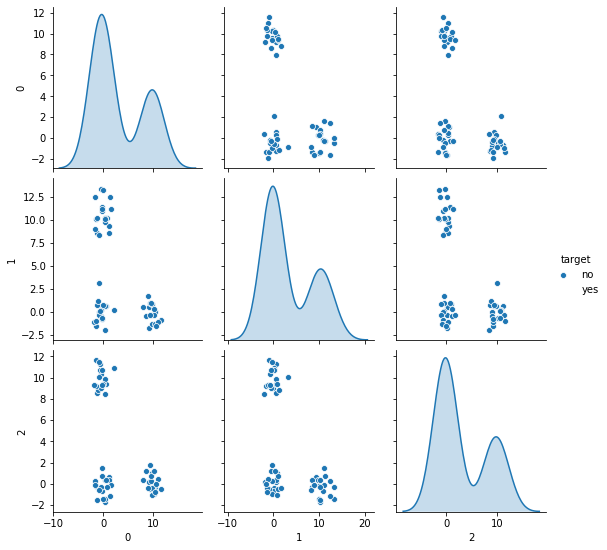

In [4]:
sns.pairplot(df, hue="target", hue_order=["no", "yes"])

### Insert "anomaly" and visualise again

In [5]:
df.iloc[-1] = [0, 0, 0, "no"]

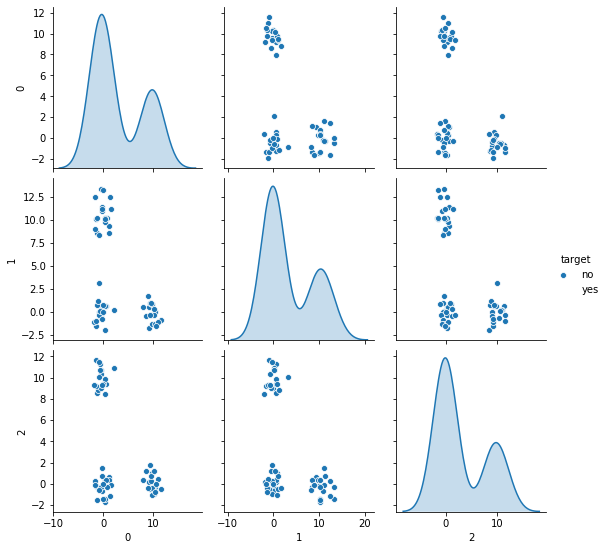

In [6]:
sns.pairplot(df, hue="target", hue_order=["no", "yes"])

#### *Question: Where is it?*

### Mark the anomaly

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


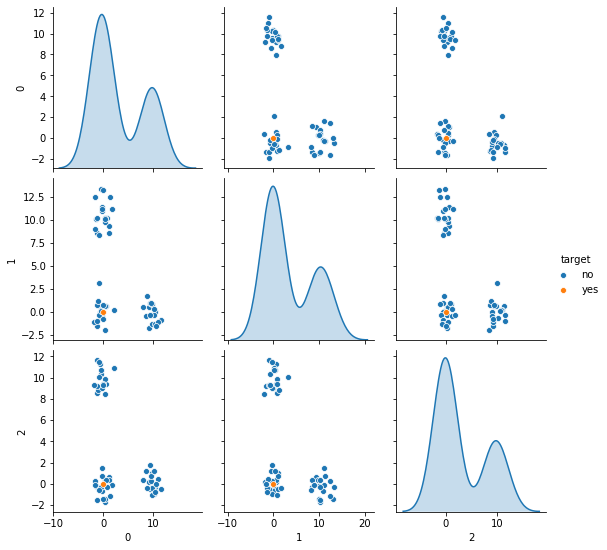

In [7]:
df.iloc[-1,3] = "yes"

sns.pairplot(df, hue="target", hue_order=["no", "yes"]) # Generates three warnings because we only have one data point belonging to the "yes" class.

### *Conclusion: With a pairplot we cannot visualise the structure of the data sufficiently.*

In [8]:
df.to_pickle("df.pkl")